## Cloud Masking with Rasterio and Earthpy

This notebook shows how to use the information contained in a quality band to apply a data mask to an image.

We will be using [eMODIS](https://www.usgs.gov/centers/eros/science/usgs-eros-archive-vegetation-monitoring-eros-moderate-resolution-imaging?qt-science_center_objects=0#qt-science_center_objects) NDVI composite downloaded from USGS

eMODIS User Guide at https://pubs.usgs.gov/of/2010/1055/pdf/OF2010-1055.pdf

In [7]:
import rasterio 
import os
from earthpy.mask import mask_pixels

In [8]:
data_folder = 'data'
ndvi_image = 'US_eMAH_NDVI.2021.264-270.1KM.VI_NDVI.006.2021272141408.tif'
quality_image = 'US_eMAH_NDVI.2021.264-270.1KM.VI_QUAL.006.2021272141408.tif'
ndvi_path = os.path.join(data_folder, ndvi_image)
quality_path = os.path.join(data_folder, quality_image)

Read the input rasters. Use the `with` statement, so we don't have to close the rasters. Save the input metadata that will be used later when saving the masked image.

In [9]:
with rasterio.open(ndvi_path) as ndvi_dataset:
    ndvi = ndvi_dataset.read()
    metadata = ndvi_dataset.meta
with  rasterio.open(quality_path) as quality_dataset:
    quality = quality_dataset.read(1)

Use `rasterio.plot` to display the images.

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from rasterio.plot import show

<AxesSubplot:title={'center':'Quality'}>

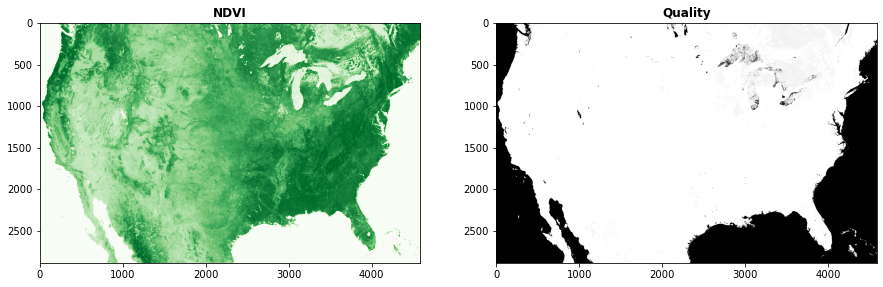

In [11]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(15,7))
show(ndvi, ax=ax0, cmap='Greens', title='NDVI')
show(quality, ax=ax1, cmap='Greys', title='Quality')

As per the user guide, the quality band contains the following pixel values

- 0 = good quality
- 1 = cloudy pixel
- 2 = bad band quality
- 3 = negative surface reflectance
- 4 = snow
- 10 = fill

Use the `earthpy.mask` module to mask the NDVI pixels with value=1 from the quality band

In [12]:
masked = mask_pixels(ndvi, quality, vals=[1])

<AxesSubplot:title={'center':'Cloud Masked NDVI'}>

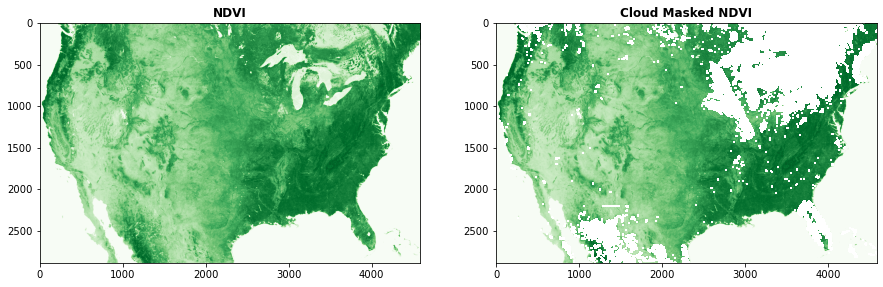

In [13]:
fig, (ax0, ax1) = plt.subplots(1,2, figsize=(15,7))
show(ndvi, ax=ax0, cmap='Greens', title='NDVI')
show(masked, ax=ax1, cmap='Greens', title='Cloud Masked NDVI')

We need to assign a nodata value to the masked pixels. The input file does not have any metadata but uses -2000 as the fill value. We do the same.

In [14]:
masked = masked.filled(-2000)

In [15]:
masked_image_name = 'ndvi_masked.tif'
output_path = os.path.join(data_folder, masked_image_name)

with rasterio.open(output_path, 'w', **metadata) as output_dataset:
    output_dataset.write(masked)